In [132]:
from arcgis.gis import GIS
from arcgis.raster.functions import *
from arcgis.geocoding import geocode
from arcgis.geometry import lengths
gis = GIS()

## Read South Bend Street Paving Report

In [133]:
import pandas as pd
paving_reports = {}
years = ['2012','2013','2014','2015','2016']
cols = ['Road/Street',
        'From',
        'To',
        'Length',
        'Width',
        'New Construction',
        'Rehabilitation',
        'Resurfacing',
        'Surface Treatment',
        'Traffic/Safety',
        'Federal Aid Used',
        'Contract Total',
        'LPAMaterials',
        'LPALabor',
        'LPAEquipment',
        'Total Cost']

# read individual years
for yr in years:
    report = pd.read_excel('South Bend Street Paving.xlsx',yr)[10:]
    report.columns = cols
    for idx in report.index:
        report.loc[idx,'Year'] = yr
        if 'TOTAL MVH' in report.loc[idx,'Road/Street']:
            report.drop(idx,inplace=True)
    paving_reports[yr] = report

paving_report = pd.concat([paving_reports[yr] for yr in years])
paving_report.fillna('')
paving_report['idx'] = range(0,len(paving_report))
paving_report = paving_report.set_index('idx')
paving_report.tail()

,Road/Street,From,To,Length,Width,New Construction,Rehabilitation,Resurfacing,Surface Treatment,Traffic/Safety,Federal Aid Used,Contract Total,LPAMaterials,LPALabor,LPAEquipment,Total Cost,Year
idx,,,,,,,,,,,,,,,,,
216,Maple St.,Thomas St.,South 150 Ft.,150,20,NaN,X,NaN,NaN,NaN,NaN,NaN,1330.92,356.68,309.03,1996.63,2016
217,Humboldt St.,Cleveland Ave.,Blaine Ave.,250,26,NaN,X,NaN,NaN,NaN,NaN,NaN,1840.72,515.96,844.24,3200.93,2016
218,Kessler Blvd.,Rose St.,West 180 Ft.,180,40,NaN,X,NaN,NaN,NaN,NaN,NaN,519.325,631,587.65,1737.97,2016
219,Club Dr.,Tuxedo Dr.,Eunice Dr.,310,28,NaN,X,NaN,NaN,NaN,NaN,NaN,4747.16,2188.4,1736.69,8672.25,2016
220,Washington St.,Tuxedo Dr.,Ironwood Dr.,300,16,NaN,X,NaN,NaN,NaN,NaN,NaN,642.2,201.94,474.08,1318.22,2016


## South Bend Mapping Functions

In [129]:
m = gis.map('South Bend, Indiana',12)
m.basemap = 'streets'
m

In [131]:
for i in range(0,10):
    street = paving_report.loc[i,'Road/Street']
    start = paving_report.loc[i,'From']
    stop = paving_report.loc[i,'To']
    i1 = street + ' and ' + start
    i2 = street + ' and ' + stop
    multi_field_intersection = {
        "Address" : i1,
        "City" : "South Bend",
        "Region" : "IN"
    }
    print(street)
    inter = geocode(multi_field_intersection)[0]
    m.draw(inter['location'])

Williams St.
Taylor St.
Walnut St.
Phillipa St.
Meade St.
Dunham St.
Bella Vista
Bella Vista
Albert St. 
Edison St.


## Playing with Landsat Images

In [4]:
landsat_item = gis.content.search('"Landsat Multispectral"', 'Imagery Layer')[0]
landsat_item

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

In [6]:
landsat = landsat_item.layers[0]

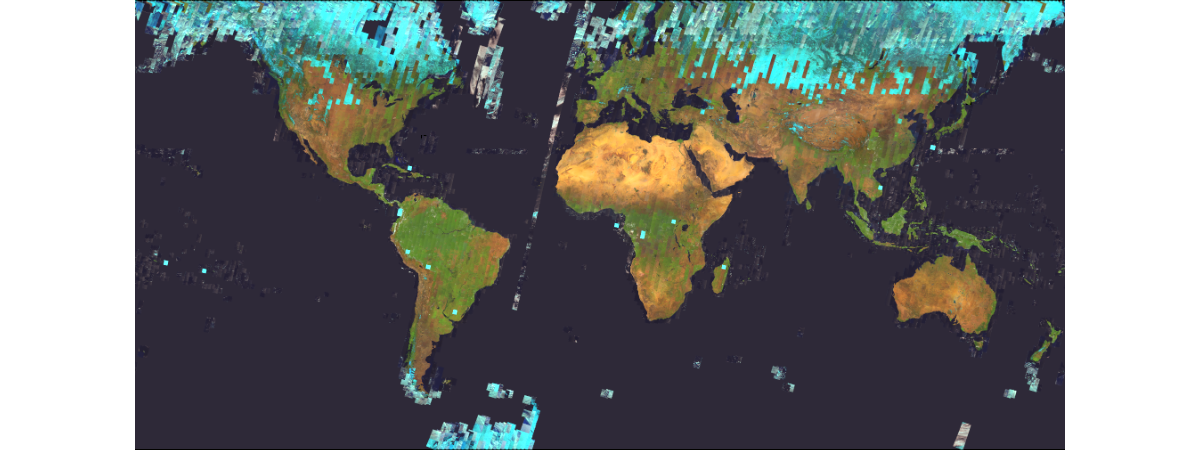

In [7]:
landsat

In [20]:
def extract_stretch(bandids):
    return stretch(extract_band(landsat, bandids),
                   stretch_type='PercentClip',
                   min_percent=2, 
                   max_percent=2,
                   dra=True, 
                   gamma=[0.8,0.8,0.8])

In [24]:
from arcgis.geocoding import geocode
area = geocode('International Falls, Minnesota')[0]

In [26]:
m = gis.map(area,10)
m

In [27]:
m.add_layer(extract_stretch([5, 4, 1]))